# IMDb - Rating 

<img src="image.jpg" height=100px width=500px></img>

# Problem statement: 


IMDb(Internet Movie Database) is the world's most popular and authoritative online database for movie, TV and celebrity content.The database had been expanded to include additional categories of filmmakers and other demographic material as well as trivia, biographies, and plot summaries. The movie ratings had been properly integrated with the list data, and a centralized email interface for querying the database had been created by Alan Jay.

IMDb_5000 is a dataset with 5000 rows of movie information including features such as facebook likes of the cast, gross, budget, critic reviews and so on.

In this challenge,the classification model is expected to predict if the movie is "hit/average/flop" based on selected attribues.

## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import missingno as ms

In [3]:
%matplotlib inline

## Reading the csv file

In [4]:
data = pd.read_csv('C:\imdb\movie.csv')

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.head(100)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [8]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


## Data Pre-processing

## Correlation between attributes

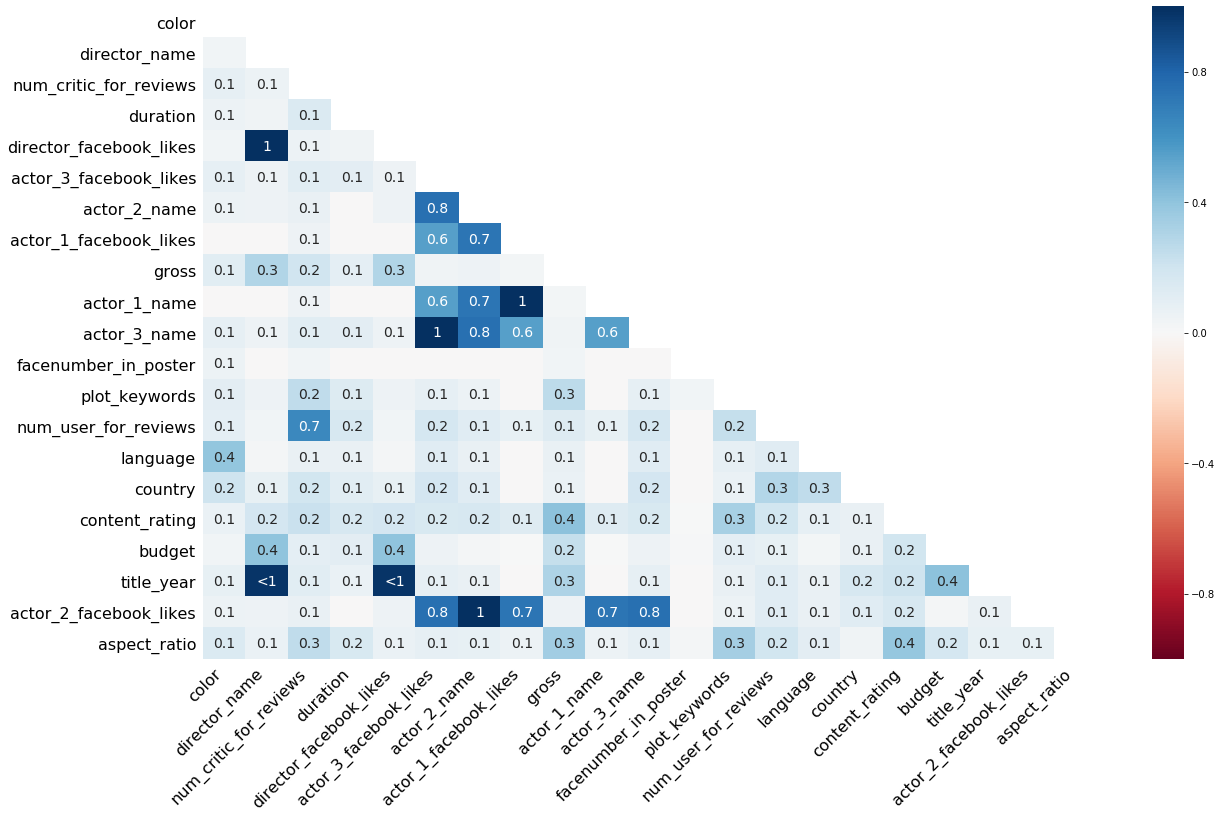

In [9]:
ms.heatmap(data)

## Visualization

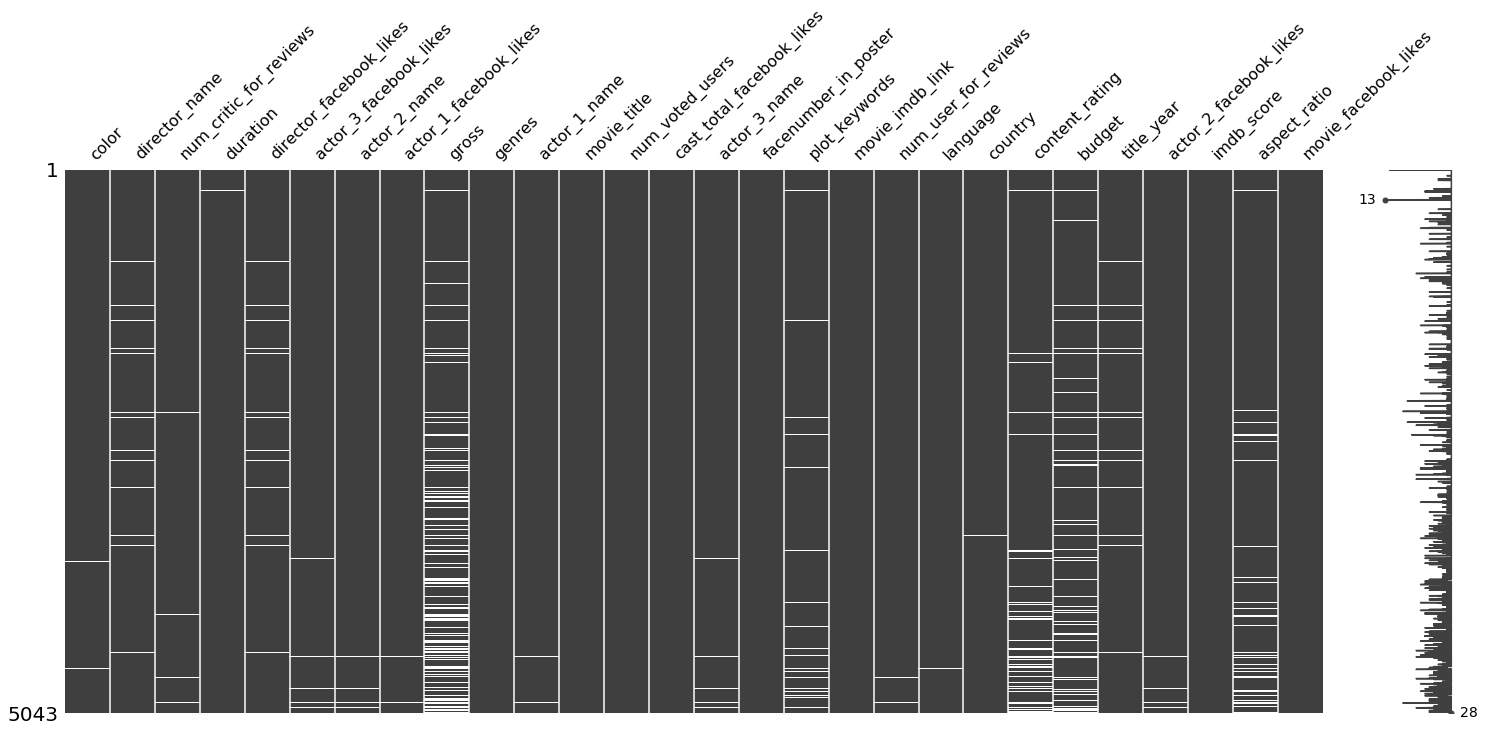

In [10]:
ms.matrix(data)

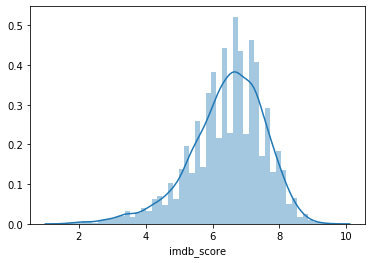

In [11]:
sns.distplot(data['imdb_score'])

## Removing null values

In [12]:
ndata=data.dropna(inplace=True)
data.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

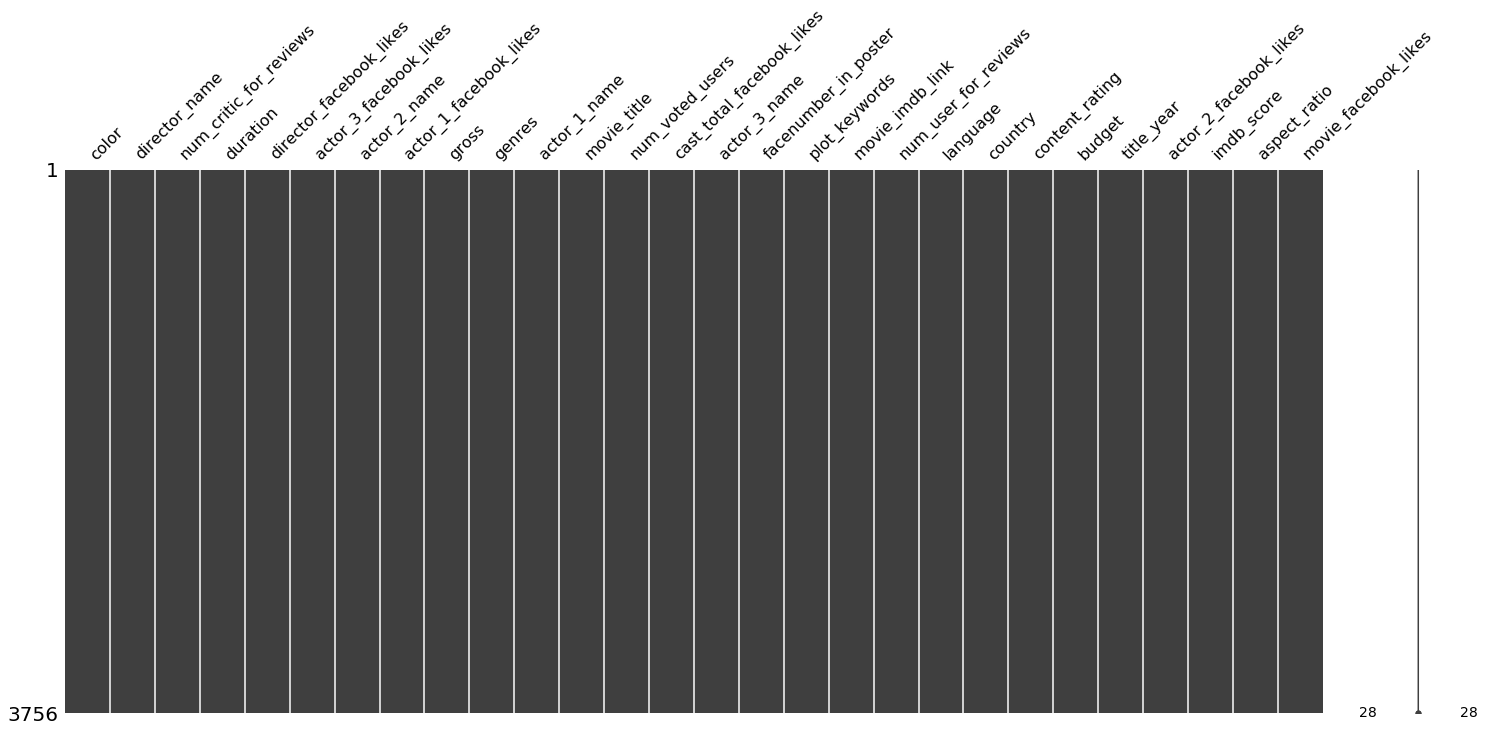

In [13]:
ms.matrix(data)

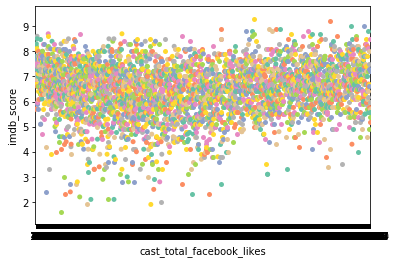

In [14]:
sns.swarmplot
sns.swarmplot(x='cast_total_facebook_likes',y='imdb_score',data=data,palette='Set2')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 28 columns):
color                        3756 non-null object
director_name                3756 non-null object
num_critic_for_reviews       3756 non-null float64
duration                     3756 non-null float64
director_facebook_likes      3756 non-null float64
actor_3_facebook_likes       3756 non-null float64
actor_2_name                 3756 non-null object
actor_1_facebook_likes       3756 non-null float64
gross                        3756 non-null float64
genres                       3756 non-null object
actor_1_name                 3756 non-null object
movie_title                  3756 non-null object
num_voted_users              3756 non-null int64
cast_total_facebook_likes    3756 non-null int64
actor_3_name                 3756 non-null object
facenumber_in_poster         3756 non-null float64
plot_keywords                3756 non-null object
movie_imdb_link              3756 non-

In [16]:
data.shape

(3756, 28)

In [17]:
x=data.iloc[:,25]
print(x)
print(x.shape)

0       7.9
1       7.1
2       6.8
3       8.5
5       6.6
6       6.2
7       7.8
8       7.5
9       7.5
10      6.9
11      6.1
12      6.7
13      7.3
14      6.5
15      7.2
16      6.6
17      8.1
18      6.7
19      6.8
20      7.5
21      7.0
22      6.7
23      7.9
24      6.1
25      7.2
26      7.7
27      8.2
28      5.9
29      7.0
30      7.8
       ... 
4930    6.3
4931    7.9
4933    7.4
4936    7.5
4941    7.5
4955    6.7
4956    4.2
4959    7.0
4962    7.0
4964    6.8
4971    6.6
4973    7.5
4975    5.3
4977    7.3
4978    5.6
4979    5.6
4984    6.6
4987    6.3
4997    7.5
4998    7.6
5008    7.8
5011    7.3
5012    5.7
5015    7.1
5025    6.1
5026    6.9
5027    7.5
5033    7.0
5035    6.9
5042    6.6
Name: imdb_score, Length: 3756, dtype: float64
(3756,)


## Classifying target values

The imdb column is converted into a list and then classified into three categories namely "hit","average","flop".

In [18]:
l=[]
print(type(x))
print(x[0])

<class 'pandas.core.series.Series'>
7.9


In [19]:
l=[]
for i in x:
    if(0<=i and i<=4):
        l.append('flop')
    elif(4<i and i<=7):
        l.append('avg')
    elif (7<i and i<=10):
        l.append('hit')
print(len(l))
l = pd.Series(l)
print(l)

3756
0       hit
1       hit
2       avg
3       hit
4       avg
5       avg
6       hit
7       hit
8       hit
9       avg
10      avg
11      avg
12      hit
13      avg
14      hit
15      avg
16      hit
17      avg
18      avg
19      hit
20      avg
21      avg
22      hit
23      avg
24      hit
25      hit
26      hit
27      avg
28      avg
29      hit
       ... 
3726    avg
3727    hit
3728    hit
3729    hit
3730    hit
3731    avg
3732    avg
3733    avg
3734    avg
3735    avg
3736    avg
3737    hit
3738    avg
3739    hit
3740    avg
3741    avg
3742    avg
3743    avg
3744    hit
3745    hit
3746    hit
3747    hit
3748    avg
3749    hit
3750    avg
3751    avg
3752    hit
3753    avg
3754    avg
3755    avg
Length: 3756, dtype: object


In [20]:
a=float(input("enter the imdb rating: "))
if(0<=a and a<=4):
    print('flop')
elif(4<a and a<=7):
    print('avg')
elif (7<a and a<=10):
    print('hit')

enter the imdb rating: 5.7
avg


## Creating dataframe for selected attributes

In [21]:
fdata=data[["num_critic_for_reviews","director_facebook_likes","actor_3_facebook_likes","actor_1_facebook_likes","num_voted_users","cast_total_facebook_likes","actor_2_facebook_likes","movie_facebook_likes"]].copy()

In [22]:
print(fdata)

      num_critic_for_reviews  director_facebook_likes  actor_3_facebook_likes  \
0                      723.0                      0.0                   855.0   
1                      302.0                    563.0                  1000.0   
2                      602.0                      0.0                   161.0   
3                      813.0                  22000.0                 23000.0   
5                      462.0                    475.0                   530.0   
6                      392.0                      0.0                  4000.0   
7                      324.0                     15.0                   284.0   
8                      635.0                      0.0                 19000.0   
9                      375.0                    282.0                 10000.0   
10                     673.0                      0.0                  2000.0   
11                     434.0                      0.0                   903.0   
12                     403.0

In [23]:
print(data.shape)

(3756, 28)


## Model selection

## Training and testing

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(fdata,l,test_size=0.30,random_state=101)

## Training the model

## KNN Classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, Y_train) 

## Confusion matrix

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(Y_test, knn_predictions) 
print(cm)

[[651   0 120]
 [ 26   0   1]
 [184   0 145]]


## Accuracy

In [27]:
 accuracy = knn.score(X_test, Y_test) 
print (accuracy)

0.7062999112688554


In [28]:
from sklearn.metrics import accuracy_score 
print ('Accuracy Score :',accuracy_score(Y_test, knn_predictions))

Accuracy Score : 0.7062999112688554


## Naive Bayes Classifier

In [29]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, Y_train) 
gnb_predictions = gnb.predict(X_test) 

## Confusion matrix

In [30]:
cm = confusion_matrix(Y_test, gnb_predictions)
print(cm)

[[232 447  92]
 [  3  24   0]
 [104 110 115]]


## Accuracy

In [31]:
accuracy = gnb.score(X_test, Y_test) 
print ('Accuracy score: ',accuracy)

Accuracy score:  0.32919254658385094


# Logistic Regression

## Target values:

In [39]:
print(x)

0       7.9
1       7.1
2       6.8
3       8.5
5       6.6
6       6.2
7       7.8
8       7.5
9       7.5
10      6.9
11      6.1
12      6.7
13      7.3
14      6.5
15      7.2
16      6.6
17      8.1
18      6.7
19      6.8
20      7.5
21      7.0
22      6.7
23      7.9
24      6.1
25      7.2
26      7.7
27      8.2
28      5.9
29      7.0
30      7.8
       ... 
4930    6.3
4931    7.9
4933    7.4
4936    7.5
4941    7.5
4955    6.7
4956    4.2
4959    7.0
4962    7.0
4964    6.8
4971    6.6
4973    7.5
4975    5.3
4977    7.3
4978    5.6
4979    5.6
4984    6.6
4987    6.3
4997    7.5
4998    7.6
5008    7.8
5011    7.3
5012    5.7
5015    7.1
5025    6.1
5026    6.9
5027    7.5
5033    7.0
5035    6.9
5042    6.6
Name: imdb_score, Length: 3756, dtype: float64


## Attributes taken as inputs:

In [40]:
print(fdata)

      num_critic_for_reviews  director_facebook_likes  actor_3_facebook_likes  \
0                      723.0                      0.0                   855.0   
1                      302.0                    563.0                  1000.0   
2                      602.0                      0.0                   161.0   
3                      813.0                  22000.0                 23000.0   
5                      462.0                    475.0                   530.0   
6                      392.0                      0.0                  4000.0   
7                      324.0                     15.0                   284.0   
8                      635.0                      0.0                 19000.0   
9                      375.0                    282.0                 10000.0   
10                     673.0                      0.0                  2000.0   
11                     434.0                      0.0                   903.0   
12                     403.0

## Training and Testing:

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(fdata,l,test_size=0.30,random_state=101)

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
logmodel = LogisticRegression()

In [55]:
logmodel.fit(X_train,Y_train)

C:\Users\Harika Kasimahanthi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Harika Kasimahanthi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
predicted =  logmodel.predict(X_test)
predicted

array(['avg', 'hit', 'avg', ..., 'avg', 'hit', 'hit'], dtype=object)

In [57]:
from sklearn.metrics import confusion_matrix, classification_report

In [58]:
print(confusion_matrix(Y_test, predicted))

[[689   0  82]
 [ 27   0   0]
 [194   0 135]]


In [64]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,predicted))

              precision    recall  f1-score   support

         avg       0.76      0.89      0.82       771
        flop       0.00      0.00      0.00        27
         hit       0.62      0.41      0.49       329

    accuracy                           0.73      1127
   macro avg       0.46      0.43      0.44      1127
weighted avg       0.70      0.73      0.71      1127

